Until now, we have implemented manually in raw numpy. The goal of this assignment is to make you familiar with PyTorch and work with Convolutional Neural Networks which are better in Image classification. PyTorch is a deep learning framework and working with it is very similar to python. The major advantages it provides are:

- Work with GPUs
- Has automatic differentiation

In this, assignment we will implement a classifier based on Convolutional Neural Network on SVHN dataset. A CNN is a more suitable type of architecture to process image data. Following is the architecture we will build  

In [23]:
import numpy as np
import torch
import random
import time
if torch.cuda.is_available():
    print("working on gpu!")
    device = 'cuda'
else:
    print("No gpu! only cpu ;)")
    device = 'cpu'

## The following random seeds are just for deterministic behaviour of the code and evaluation

##############################################################################
################### DO NOT MODIFY THE CODE BELOW #############################    
##############################################################################

if device == 'cpu':    
    random.seed(42)
    np.random.seed(42)
    torch.manual_seed(42)
elif device == 'gpu':
    random.seed(42)
    np.random.seed(42)
    torch.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = '42'

###############################################################################    

No gpu! only cpu ;)


### Arranging the data

In the following cell we will be loading the data that is already downloaded and made available for you in the servers. 

We implement the following parts in the next cell.
- import the pytorch packages which help us in data handling initially. (done it for you!)
- define the train and test transforms to be applied on the input
- create dataloaders for train and test data
- define the parameters for data handling

In [24]:
import torchvision
import torchvision.transforms as transforms
import os

if not os.path.isdir('./data'):
    os.mkdir('./data')
root = './data/'

training_data = torchvision.datasets.FashionMNIST(root, train=True, transform=transforms.ToTensor(),download=True)
testing_data = torchvision.datasets.FashionMNIST(root, train=False, transform=transforms.ToTensor(),download=True)

train_bs = 32
test_bs = 8

### BEGIN SOLUTION
train_loader=torch.utils.data.DataLoader(dataset=training_data, batch_size=train_bs, shuffle=True, drop_last=True)
test_loader=torch.utils.data.DataLoader(dataset=testing_data, batch_size=test_bs, shuffle=True, drop_last=False)
### END SOLUTION
    
train_loader = None
test_loader = None

##### REMOVE THE CODE BELOW
train_loader=torch.utils.data.DataLoader(dataset=training_data, batch_size=train_bs, shuffle=True, drop_last=True)
test_loader=torch.utils.data.DataLoader(dataset=testing_data, batch_size=test_bs, shuffle=True, drop_last=False)
##### 

### Peek into data

In general, it is always important study the data from every angle to build a good discriminative model. It will help us to notice things and give a good understanding of the requirements of our model. In the following cell we just peek into a random batch of images.

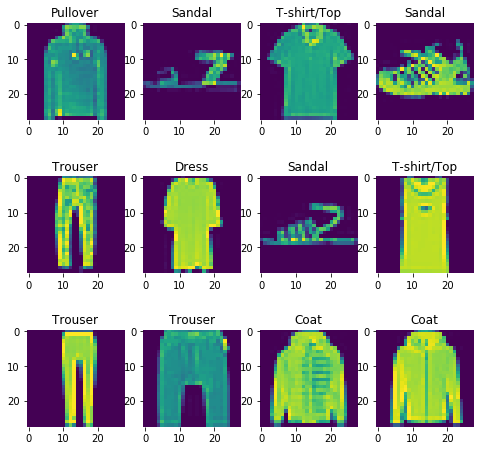

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


## get a batch of data
images, labels = iter(train_loader).next()


image_dict = {0:'T-shirt/Top', 1:'Trouser', 2:'Pullover', 3:'Dress',
              4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker',
              8:'Bag', 9:'Ankle Boot'}

fig = plt.figure(figsize=(8,8))

for i in np.arange(1, 13):
    ax = fig.add_subplot(3,4,i, frameon=False)
    img = images[i][0]
    ax.set_title(image_dict[labels[i].item()])
    plt.imshow(img)


### Architecture

We use the following layers in our model.
- a convolution layer for extracting spatial relationships.
- batchnorm layer for normalizing the weights in the hidden layers
- ReLU activation function for the non-linearity between layers
- dropout for regularization
- and finally fully connected layers in the end

#### Model:

we build the following convolutional neural network architecture on the dataset. 

- convolution layer output_channels-16 kernel_size=5 stride=1 padding-2
- batchnormalization layer
- ReLU activation layer
- maxpool layer kernel_size=2 stride=2
- convolution layer output_channels-32 kernel_size=5 stride=1 padding-2
- batchnormalization layer
- ReLU activation layer
- maxpool layer kernel_size=2 stride=2
- fully connected layer 256
- fully connected layer number_of_classes

### Build the model

- We first define a class called Model.
- In init, we will define all the layers that will be used to build the model
- Forward builds the sequential model taking in Input and returns the Output.



In [26]:
import torch.nn as nn

class Model(nn.Module):
    ## init function is the model initializer.
    ## we define all the layers used in our model. 
    def __init__(self, num_classes=8):
        super(Model, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
#         self.bn1 = nn.BatchNorm2d(16)
        ''' 
        REST OF THE MODEL HERE
        
        ## define a relu layer and as it don't have any parameters it can be reused
        
        ## define a maxpool layer as it has zero parameters it can be reused
        
        ## define a convolution layer with provided parameters 
        
        ## define a batchnorm layer, the num_features is the same as number of output channels from previous layer
        
        ## As relu and maxpool are parameterless layers, they can be reused.
        ## define a fully connected layer with input_size = flattened output of previous layer, output=defined size
        
        ## define a fully connected layer with input_size=output_size of previous layer and output_size=num_classes
        
        '''
        ### BEGIN SOLUTION 
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(1568,256)
        self.fc2 = nn.Linear(256, num_classes)
        ### END SOLUTION 
        
    def forward(self, x):
        ### BEGIN SOLUTION
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        ### END SOLUTION
        
#         x = self.conv1(x)
#         x = self.bn1(x)
        
        '''
        REST OF THE CODE HERE.
        
        
        Note that before the fully connected(fc) layer, the output is a feature map with size (N,C,H,W)
        but a fully connected layers expects a input of size (N, some-number). so before passing the output of maxpool
        layer to fc layer we must first flatten the output of previous layer to a size (N,C*H*W) and then pass
        it to the fully connected layer.  
         
        '''
        return x
    

In [27]:
learning_rate = 0.0001
epochs = 10
number_of_classes = 10

In [28]:
## define a instance of the class Model and name it as "model"
model = Model(number_of_classes)
test_input = torch.randn(16,1,28,28)
out = model(test_input)
print(out.size())
print(torch.sum(out))
### hidden test case how to write ask raghav


torch.Size([16, 10])
tensor(6.7498)


Define a loss criterion, In this assignment we will use cross-entropy loss between the predictions and ground truth to estimate the loss. 
- CrossEntropyLoss - https://pytorch.org/docs/stable/nn.html#crossentropyloss

We also define a optimization strategy to update the weights. In this assignment we use Stochastic Gradient descent with Nesterov momentun from the PyTorch package. 

- SGD - https://pytorch.org/docs/stable/optim.html#algorithms (scroll to optim.SGD)

In [29]:
# define the loss
### BEGIN SOLUTION
criterion = nn.CrossEntropyLoss()
### END SOLUTION
# criterion = None

# optimizer for the model, here we use Stochastic Gradient Descent(SGD) optimizer with a learning rate=0.001 and rest default parameters.  
### BEGIN SOLUTION
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, nesterov=True)
### END SOLUTION

The training loop is setup in the following way:

For every batch in the defined number of epochs

- Move the images and labels to the device
- Extract output by passing input through the model 
- pass the output and ground truth to the loss criterion for batch loss
- clear the gradients 
- backpropagate (compute gradients w.r.t the parameters)
- update the parameters with a single optimization step
- update the training loss for plots

repeat

In [30]:
## training loop 
model.train()
t0 = time.time()
train_loss = []
## Number of epochs the model runs
for epoch in range(epochs):
    # Iterate through the batches in the data
    training_loss = 0.0
    for idx,(images,labels)  in enumerate(train_loader):
        ### BEGIN SOLUTION
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        training_loss += loss.item()
        ### END SOLUTION
        '''
        CODE HERE
        '''
        
        if idx % 750 == 0:
            print('Cross Entropy Loss: {:0.4f} Epoch [{}/{}] Iter: {}'.format(loss.item(), epoch, epochs, idx))
#             print(train_loss.append())

print("Took {} seconds for training the model".format(time.time() - t0))

Cross Entropy Loss: 2.3791 Epoch [0/10] Iter: 0
Cross Entropy Loss: 0.9618 Epoch [0/10] Iter: 750
Cross Entropy Loss: 0.7450 Epoch [0/10] Iter: 1500
Cross Entropy Loss: 0.7261 Epoch [1/10] Iter: 0
Cross Entropy Loss: 0.7162 Epoch [1/10] Iter: 750
Cross Entropy Loss: 0.5573 Epoch [1/10] Iter: 1500
Cross Entropy Loss: 0.3756 Epoch [2/10] Iter: 0
Cross Entropy Loss: 0.6432 Epoch [2/10] Iter: 750
Cross Entropy Loss: 0.2664 Epoch [2/10] Iter: 1500
Cross Entropy Loss: 0.3901 Epoch [3/10] Iter: 0
Cross Entropy Loss: 0.3284 Epoch [3/10] Iter: 750
Cross Entropy Loss: 0.4383 Epoch [3/10] Iter: 1500
Cross Entropy Loss: 0.3158 Epoch [4/10] Iter: 0
Cross Entropy Loss: 0.4287 Epoch [4/10] Iter: 750
Cross Entropy Loss: 0.2295 Epoch [4/10] Iter: 1500
Cross Entropy Loss: 0.6114 Epoch [5/10] Iter: 0
Cross Entropy Loss: 0.3595 Epoch [5/10] Iter: 750
Cross Entropy Loss: 0.4079 Epoch [5/10] Iter: 1500
Cross Entropy Loss: 0.5664 Epoch [6/10] Iter: 0
Cross Entropy Loss: 0.2283 Epoch [6/10] Iter: 750
Cross En

### Testing Loop

In the testing loop we don't update the weights. The trained model is tested for all the samples in test data to compute the accuracy and observe how well the model is generalizing to the unseen data. 

The testing loop is setup in the following way: 

For every batch in the testing data

- Turn off the gradients
- Move the images and labels to the device available
- extract output from the model for the input
- compute the prediction class by choosing the one with maximum probability in the predictions.
- Compare the prediction classes with true classes.
- calculate accuracy
- update test_loss for plots

repeat


In [31]:
## Testing Loop

model.eval()
with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total_samples = 0
    for images, labels in test_loader:
        ### BEGIN SOLUTION
        images = images.to(device)
        labels = labels.to(device)
        output = model(images)
        preds = nn.Softmax(dim=1)(output)
        _, predict = torch.max(preds, dim=1)
        correct += torch.sum(torch.squeeze(predict).cpu() == labels).item()
        ### END SOLUTION
        '''
        YOUR CODE HERE
        '''
        total_samples += labels.size(0)
    
    print("Total Accuracy on the Test set: {} %".format(correct/total_samples*100))
    

Total Accuracy on the Test set: 87.49 %


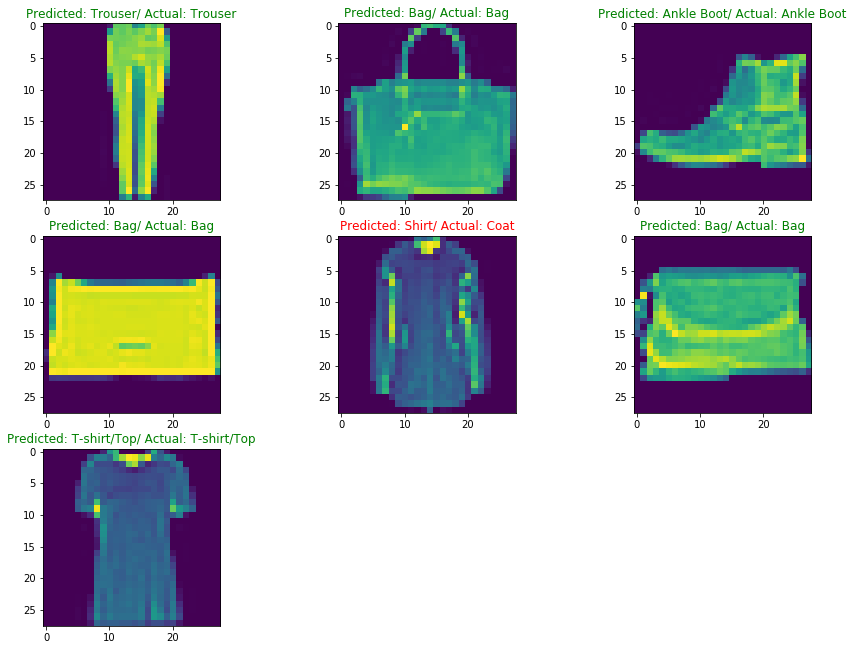

In [32]:
## Visualize the test samples with predicted output and true output
images, labels = iter(test_loader).next()
# images = images.numpy()
images = images.to(device)

out = model(images)
_, preds = torch.max(out, dim=1)

fig = plt.figure(figsize=(15,15))
for i in np.arange(1, images.size(0)):
    ax = fig.add_subplot(4, 3, i)
    plt.imshow(images[i][0])
    ax.set_title("Predicted: {}/ Actual: {}".format(image_dict[preds[i].item()], image_dict[labels[i].item()]), 
                color=('green' if preds[i] == labels[i] else 'red'))